<a href="https://colab.research.google.com/github/kimdain0222/deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_5%EC%A3%BC%EC%B0%A8(%EA%B5%90%EC%88%98_ver)gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cost function J
def J(w):
    return (w**4 - 12*w**3 + 47*w**2 - 72*w)/6 + 7 #높이(고도)

# w:가중치/ J(w): 해당 가중치에서의 손실(loss) so,J(w)를 최소화하는 w 찾는게 목표

- 일정한 간격을 갖는 특정 범위의 `1d array` 생성
> - `np.arange(a,b,c)`: `a`부터 `b`까지 `c`간격으로 생성 (`b` 미포함)
> - `np.linspace(a,b,c)`: `a`부터 `b`까지 일정한 간격으로 `c`개 원소 생성 (`b` 포함)

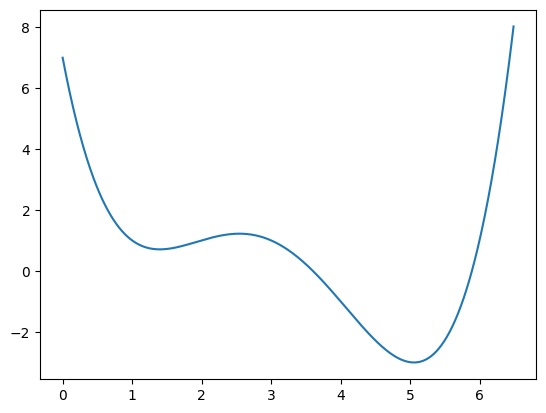

In [3]:
# 시각화
# 시각화를 위한 w의 범위: 0~6
w = np.arange(0,6.5,0.01)
y = J(w)
# plt.figure(figsize=(4,2))
plt.plot(w,y)

- `w = 5` 근처의 `J(w)` 약 `-3.0`인 최소값(global minimum_전역최소점) 존재
- `w = 1.4` 근처의 local minimum_지역최소값 (약 `0.7`) 존재

- `gradient descent` 설정
> - `w`의 초기값
> - `eta`(learning rate)의 값=학습률
> - `iter` 업데이트 횟수= 반복횟수

In [4]:
w = 6.3 #현재 위치 (내가 서 있는 곳)_모델의 현재 설정값이며 시작점에 따라 도착지가 달라져 중요함
eta = 0.1 #걸음 크기 (한 걸음에 얼마나 움직일지)
iter = 100 #걸음 수 (몇 걸음 걸을지)_ 더 이상 내려갈 곳이 없을 때까지(수렴할 때까지)_충분히 크게 잡아야 함

- `gradient descent` 구현

In [7]:
# J(w) 기울기 함수_기울기 부호보고 방향 결정
def grad_J(w):
    return (4*w**3 -36*w**2 + 94*w - 72)/6  #기울기(경사도)

print(grad_J(w))
#grad_J(w) > 0  → "오르막이야! 뒤로 가야 해_최소점이 왼쪽에" (w를 감소시켜야 함)
#grad_J(w) < 0  → "내리막이야! 앞으로 가야 해_최소점이 오른쪽에" (w를 증가시켜야 함)
#grad_J(w) = 0  → "평지야! 여기가 극점이야" (멈춤)

-2.842170943040401e-14


In [6]:
# 반복문을 통한 w의 업데이트
for i in range(iter):  #i: 현재 몇 번째 걸음인지 (0부터 시작)
    w = w - eta*grad_J(w)  #가중치 업데이트
    # 업데이트된 w와, J(w) 출력
    print('[iter]: ', i+1)  # 현재 몇 번째 걸음인지 (1부터)
    print(' - w:    ', w)  # 새로운 위치
    print(' - cost: ', J(w))  # 새로운 위치에서의 비용

[iter]:  1
 - w:     4.774200000000001
 - cost:  -2.795190840768308
[iter]:  2
 - w:     4.9158599145008
 - cost:  -2.952680447557782
[iter]:  3
 - w:     4.994080519640409
 - cost:  -2.9979278355336874
[iter]:  4
 - w:     5.030754222906423
 - cost:  -3.007532644860106
[iter]:  5
 - w:     5.046279895166979
 - cost:  -3.0092251877000162
[iter]:  6
 - w:     5.052524614853186
 - cost:  -3.0094970277809523
[iter]:  7
 - w:     5.054980805253223
 - cost:  -3.0095389589356873
[iter]:  8
 - w:     5.0559381133066505
 - cost:  -3.0095453212279235
[iter]:  9
 - w:     5.056309884463881
 - cost:  -3.009546280331543
[iter]:  10
 - w:     5.056454058861977
 - cost:  -3.0095464245477874
[iter]:  11
 - w:     5.056509939701004
 - cost:  -3.009546446211621
[iter]:  12
 - w:     5.056531594067643
 - cost:  -3.0095464494646365
[iter]:  13
 - w:     5.056539984654
 - cost:  -3.0095464499529783
[iter]:  14
 - w:     5.0565432357162585
 - cost:  -3.0095464500263915
[iter]:  15
 - w:     5.0565444953749

- `w` 초기값이 `0.5`일 때,  (낮은 곳에서 시작)
> - `eta = 0.1`: local minimum(지역 최소점)에 수렴=너무 작아서 옆에 있는 작은 골짜기만 발견
> - `eta = 1`: 발산 (엉뚱한 곳으로 날아감)
> - `eta = 0.5`: 최적값에 수렴(완벽)

- `w` 초기값이 `6.5`일 때,(높은 곳에서 시작)
> - `eta = 0.1`: 최적값에 수렴하며, `3`번째 업데이트에서(큰 걸음으로 빨리 내려와서 금방 찾음) cost가 `-2.99`가 됨
> - `eta = 0.01`: 최적값에 수렴하며, `34`번째 업데이터에서(조금씩 천천히 내려와서 오래 걸림) cost가 `-2.99`가 됨

- **Gradient descent**의 결과는 **`w`의 초기값**, **learning rate**, **업데이트 횟수** 모두에 영향을 받는다.